# 1.4 | Classification | excersise 4

## Omschrijving
In deze opdracht kijken we naar de inkomens van 40.000 Americanen. 

![alt text](images/shutterstock_income.jpeg "income")

In deze opdracht gaan we expliciet in op ongebalanceerde data. Ongebalanceerde data is een dataset waarbij de classes niet evenredig zijn vertegenwoordigd. Je hebt dus van een `class` meer voorbeelden dan van de andere `class`. 

Ik heb al eerder aangegeven dat een model een representatie is van de trainingsdata. Als we een ongebalanceerde dataset aanbieden aan een algoritme, dan zal het getrainde model een `bias` (voorkeur) krijgen richting de `class` die het meest voorkomt. Dit wil je altijd voorkomen. Stel: we hebben een dataset van alle corona (zelf) testen van Nederland. Nu is het aannemelijk dat 90% van de testen negatief (geen corona) is, en dan dus 10% positief (wel corona). Als we nu een model trainen op deze dataset, dan gaat het model deze `bias` overnemen, en zal het veel vaker negatief (geen corona) classificeren dan positief. Het zal dan vaker mensen die wel corona hebben (positief) als negatief (geen corona) classificeren.

Een bekend foutje van IBM & Microsoft, ze hebben (in 2018) een gezichtherkenner ontwikkeld die hoofdzakelijk getraind was op blanke mannen. https://www.wired.com/story/photo-algorithms-id-white-men-fineblack-women-not-so-much/

## Leerdoelen

### cross validate

### imbalanced classes
Er zijn verschillende technieken om deze `bias` tegen te gaan. De meest bekende zijn over-sampling en under-sampling. Bij over-sampling ga je de records aan de `minority` class toevoegen. Bij under-sampling ga je van de `majority` class, de records verwijderen.

![alt text](images/Over-sample-vs-under-sample.png "sampling")

Beide opties hebben zijn voor en nadelen. Als je bijvoorbeeld heel simplistisch records gaat dupliceren, dan zal het model sterker leren dat die kenmerken meer invloed hebben op de minority class. Je kan ook syntetische data toevoegen. dan genereer je nieuwe records aan de hand van bepaalde strategieen. Je moet dan wel goed opletten dat de nieuwe records ook echt mogelijk zijn (bijvoorbeeld een leeftijd van 400 jaar, of een gezin met 74 kinderen). 

Als je data gaat verwijderen, dan moet je er wel voor zorgen dat je er genoeg variantie in de dataset blijft. Als je nou net alle `outliers` weggooid dan blijft er weinig variantie over en wordt het model minder robuust voor nieuwe situaties.

## Excersise

Hieronder heb ik alvast de data ingeladen en een dummy model getraind

In [1]:
import pandas as pd 

# load the data from csv
df = pd.read_csv('data/income.csv')

# show the top 5 rows
df.head()

,age,workclass,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,25.0,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K
1,38.0,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K
2,18.0,NaN,Some-college,Never-married,NaN,Own-child,White,Female,0.0,0.0,30.0,United-States,<=50K
3,34.0,Private,10th,Never-married,Other-service,Not-in-family,White,Male,0.0,0.0,30.0,United-States,<=50K
4,29.0,NaN,HS-grad,Never-married,NaN,Unmarried,Black,Male,0.0,0.0,40.0,United-States,<=50K


Wat is de `class` verdeling?

<AxesSubplot:>

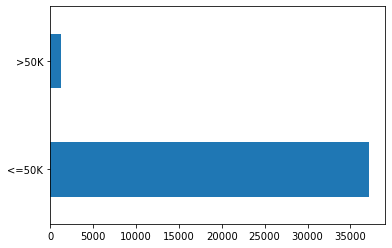

In [2]:
df['income'].value_counts().plot(kind='barh')

Als we nu een simpel dummy model trainen:

In [3]:
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split

# split the dataset into features and target
target = 'income'
X = df.loc[:, df.columns != target]
y = df[target]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

In [4]:
# define a simple classifier
dummy_clf = DummyClassifier(strategy="most_frequent")

# train the model on the training data
dummy_clf.fit(X_train, y_train)

# evaluate the model on the test data
score = dummy_clf.score(X_test, y_test)

print(f'Mean accuracy:\t{score * 100:.2f}%\t@ Testing')

Mean accuracy:	96.93%	@ Testing


Dan zien we een globale score van `83%`.. Best netjes voor een dummy model. Maar als we dan de confusion matrix bepalen

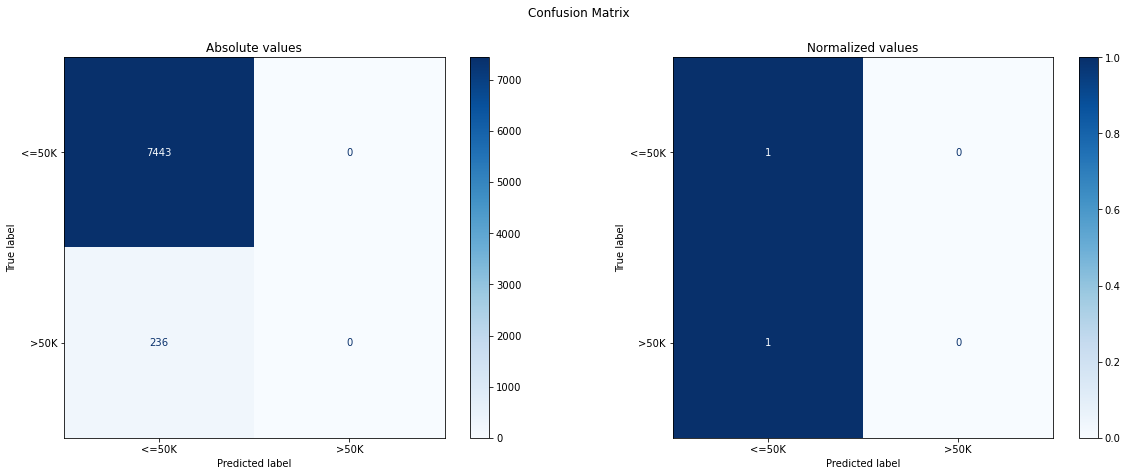

In [5]:
# define a plot
fig, axs = plt.subplots(ncols=2, figsize=(20, 7))

# Add a confusion matrix with absolute values to the plot
disp = metrics.plot_confusion_matrix(dummy_clf, X_test, y_test, normalize=None, ax=axs[0], cmap='Blues')
disp.ax_.set_title("Absolute values")

# Add a confusion matrix with normalized values to the plot
disp = metrics.plot_confusion_matrix(dummy_clf, X_test, y_test, normalize='true', ax=axs[1], cmap='Blues')
disp.ax_.set_title("Normalized values")
    
# show me
disp.figure_.suptitle("Confusion Matrix")
plt.show()

Laten we nu eens een classificatie rapport maken

In [6]:
# predict X_test
y_pred = dummy_clf.predict(X_test)

# show the classification report
print(metrics.classification_report(y_test, y_pred, zero_division=0))

              precision    recall  f1-score   support

       <=50K       0.97      1.00      0.98      7443
        >50K       0.00      0.00      0.00       236

    accuracy                           0.97      7679
   macro avg       0.48      0.50      0.49      7679
weighted avg       0.94      0.97      0.95      7679



De accurcay is heel hoog (accuracy, f1-score = 0.97). Maar zoals je ziet komt dit dus alleen door de `<=50K` classe (f1-score = 0.98). De `>50K` classe (f1-score = 0.00) scoort bedroevend slecht. We kunnen beter naar de (macro avg, f1-score = 0.49) kijken. Deze houdt rekening met alle classes.

Nu is de beurt aan jouw:
- balanceerd de dataset
- experimenteer met andere algoritmes


## Hints

- [handle-imbalanced-datasets](https://www.kdnuggets.com/2020/01/5-most-useful-techniques-handle-imbalanced-datasets.html)

## Verwachte uitkomst

Genereer dataset

In [7]:
# from sklearn.datasets import fetch_openml
# from imblearn.datasets import make_imbalance

# # load the income dataset
# df, y = fetch_openml("adult", version=2, as_frame=True, return_X_y=True)

# # drop these columns
# df = df.drop(columns=["fnlwgt", "education-num"])

# # get the counts per class
# classes_count = y.value_counts()

# # whats the desired class ratio 
# ratio = 30

# # purposely imbalance the dataset
# df_res, y_res = make_imbalance(
#     df,
#     y,
#     sampling_strategy={classes_count.idxmin(): classes_count.max() // ratio},
# )

# # now combine it and save it
# df_res['income'] = y_res
# df_res.to_csv('data/income.csv', index=False)

opdracht

In [8]:
from sklearn.model_selection import cross_validate
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.compose import make_column_selector as selector
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier
from imblearn.pipeline import make_pipeline as make_pipeline_with_sampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.experimental import enable_hist_gradient_boosting  # noqa
from sklearn.ensemble import HistGradientBoostingClassifier
from imblearn.ensemble import BalancedBaggingClassifier

# =============================================================================
# https://imbalanced-learn.org/stable/auto_examples/applications/plot_impact_imbalanced_classes.html#sphx-glr-download-auto-examples-applications-plot-impact-imbalanced-classes-py
# =============================================================================

df_res = X_train.copy()
y_res = y_train.copy()

index = []
scores = {"Accuracy": [], "Balanced accuracy": []}

# =============================================================================
# Dummy classifier
# =============================================================================

dummy_clf = DummyClassifier(strategy="most_frequent")
scoring = ["accuracy", "balanced_accuracy"]
cv_result = cross_validate(dummy_clf, df_res, y_res, scoring=scoring)

print(f"Accuracy score of a dummy classifier: {cv_result['test_accuracy'].mean():.3f}")
print(f"Balanced accuracy score of a dummy classifier: {cv_result['test_balanced_accuracy'].mean():.3f}")

index += ["Dummy classifier"]
cv_result = cross_validate(dummy_clf, df_res, y_res, scoring=scoring)
scores["Accuracy"].append(cv_result["test_accuracy"].mean())
scores["Balanced accuracy"].append(cv_result["test_balanced_accuracy"].mean())

# =============================================================================
# Linear classifier
# =============================================================================

num_pipe = make_pipeline(
    StandardScaler(), SimpleImputer(strategy="mean", add_indicator=True)
)
cat_pipe = make_pipeline(
    SimpleImputer(strategy="constant", fill_value="missing"),
    OneHotEncoder(handle_unknown="ignore"),
)
preprocessor_linear = make_column_transformer(
    (num_pipe, selector(dtype_include="number")),
    (cat_pipe, selector(dtype_include="category")),
    n_jobs=2,
)
lr_clf = make_pipeline(preprocessor_linear, LogisticRegression(max_iter=1000))

index += ["Logistic regression"]
cv_result = cross_validate(lr_clf, df_res, y_res, scoring=scoring)
scores["Accuracy"].append(cv_result["test_accuracy"].mean())
scores["Balanced accuracy"].append(cv_result["test_balanced_accuracy"].mean())

# =============================================================================
# Random forrest
# =============================================================================

num_pipe = SimpleImputer(strategy="mean", add_indicator=True)
cat_pipe = make_pipeline(
    SimpleImputer(strategy="constant", fill_value="missing"),
    OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1),
)

preprocessor_tree = make_column_transformer(
    (num_pipe, selector(dtype_include="number")),
    (cat_pipe, selector(dtype_include="category")),
    n_jobs=2,
)

rf_clf = make_pipeline(
    preprocessor_tree, RandomForestClassifier(random_state=42, n_jobs=2)
)

index += ["Random forest"]
cv_result = cross_validate(rf_clf, df_res, y_res, scoring=scoring)
scores["Accuracy"].append(cv_result["test_accuracy"].mean())
scores["Balanced accuracy"].append(cv_result["test_balanced_accuracy"].mean())

# =============================================================================
# Logistic regression with balanced class weights
# =============================================================================

lr_clf.set_params(logisticregression__class_weight="balanced")

index += ["Logistic regression with balanced class weights"]
cv_result = cross_validate(lr_clf, df_res, y_res, scoring=scoring)
scores["Accuracy"].append(cv_result["test_accuracy"].mean())
scores["Balanced accuracy"].append(cv_result["test_balanced_accuracy"].mean())

# =============================================================================
# Random forest with balanced class weights
# =============================================================================

rf_clf.set_params(randomforestclassifier__class_weight="balanced")

index += ["Random forest with balanced class weights"]
cv_result = cross_validate(rf_clf, df_res, y_res, scoring=scoring)
scores["Accuracy"].append(cv_result["test_accuracy"].mean())
scores["Balanced accuracy"].append(cv_result["test_balanced_accuracy"].mean())

# =============================================================================
# Under-sampling + Logistic regression
# =============================================================================

lr_clf = make_pipeline_with_sampler(
    preprocessor_linear,
    RandomUnderSampler(random_state=42),
    LogisticRegression(max_iter=1000),
)

index += ["Under-sampling + Logistic regression"]
cv_result = cross_validate(lr_clf, df_res, y_res, scoring=scoring)
scores["Accuracy"].append(cv_result["test_accuracy"].mean())
scores["Balanced accuracy"].append(cv_result["test_balanced_accuracy"].mean())

# =============================================================================
# Under-sampling + Random forest
# =============================================================================

rf_clf = make_pipeline_with_sampler(
    preprocessor_tree,
    RandomUnderSampler(random_state=42),
    RandomForestClassifier(random_state=42, n_jobs=2),
)

index += ["Under-sampling + Random forest"]
cv_result = cross_validate(rf_clf, df_res, y_res, scoring=scoring)
scores["Accuracy"].append(cv_result["test_accuracy"].mean())
scores["Balanced accuracy"].append(cv_result["test_balanced_accuracy"].mean())

# =============================================================================
# Balanced random forest
# =============================================================================

rf_clf = make_pipeline(
    preprocessor_tree,
    BalancedRandomForestClassifier(random_state=42, n_jobs=2),
)
index += ["Balanced random forest"]
cv_result = cross_validate(rf_clf, df_res, y_res, scoring=scoring)
scores["Accuracy"].append(cv_result["test_accuracy"].mean())
scores["Balanced accuracy"].append(cv_result["test_balanced_accuracy"].mean())

# =============================================================================
# Show results
# =============================================================================

bag_clf = make_pipeline(
    preprocessor_tree,
    BalancedBaggingClassifier(
        base_estimator=HistGradientBoostingClassifier(random_state=42),
        n_estimators=10,
        random_state=42,
        n_jobs=2,
    ),
)

index += ["Balanced bag of histogram gradient boosting"]
cv_result = cross_validate(bag_clf, df_res, y_res, scoring=scoring)
scores["Accuracy"].append(cv_result["test_accuracy"].mean())
scores["Balanced accuracy"].append(cv_result["test_balanced_accuracy"].mean())

# =============================================================================
# Show results
# =============================================================================

df_scores = pd.DataFrame(scores, index=index)
df_scores

Accuracy score of a dummy classifier: 0.967
Balanced accuracy score of a dummy classifier: 0.500


,Accuracy,Balanced accuracy
Dummy classifier,0.967376,0.500000
Logistic regression,0.969851,0.547098
Random forest,0.973693,0.624299
Logistic regression with balanced class weights,0.734389,0.689620
Random forest with balanced class weights,0.801914,0.674394
Under-sampling + Logistic regression,0.734226,0.686166
Under-sampling + Random forest,0.691769,0.693636
Balanced random forest,0.671974,0.714738
Balanced bag of histogram gradient boosting,0.719314,0.731000


In [9]:
# predict X_test
y_pred = bag_clf.predict(X_test)

# show the classification report
print(metrics.classification_report(y_test, y_pred, zero_division=0))

NotFittedError: This ColumnTransformer instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.